In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\Tathagat\Documents\Data\insurance.csv') # ths source of this dataset is Kaggle
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum() #check for missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

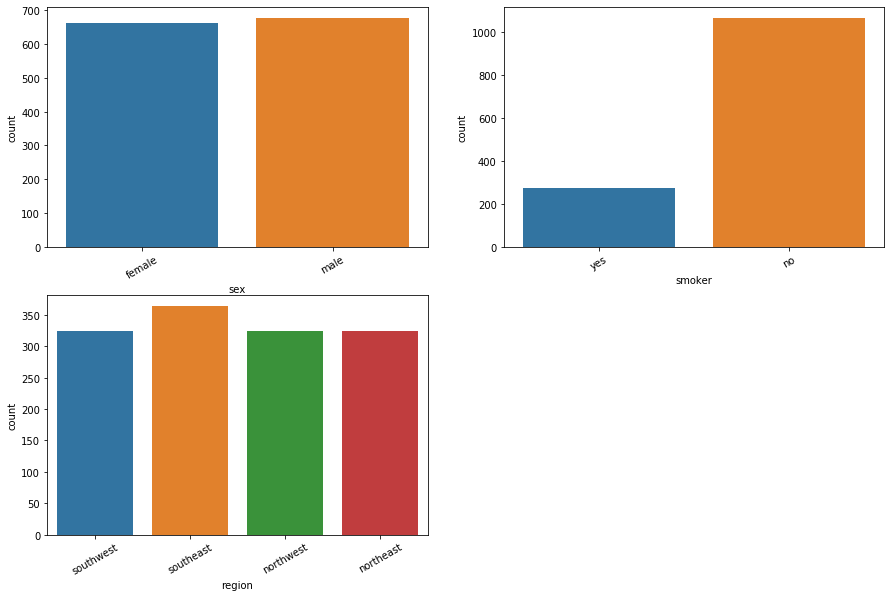

In [10]:
# frequency bar graphs for the categorical data
fig = plt.figure(figsize = (15,15))
axes = 320
for i in ['sex','smoker','region']:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = i)
    plt.xticks(rotation=30)
plt.show()

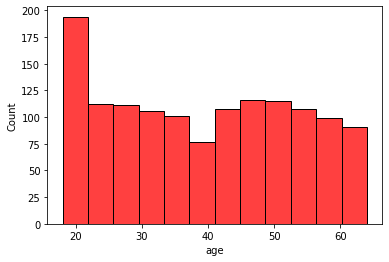

In [11]:
# histograms for age
sns.histplot(df['age'],color="red")
plt.show()

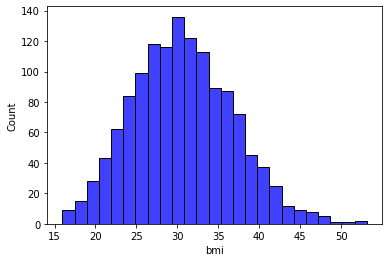

In [12]:
# histograms for bmi
sns.histplot(df['bmi'],color="blue")
plt.show()

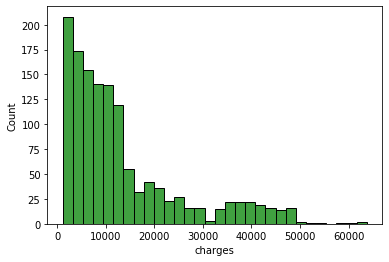

In [13]:
# histograms for charges
sns.histplot(df['charges'],color="green")
plt.show()

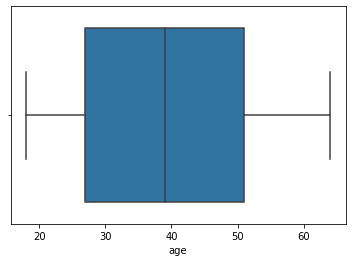

In [14]:
# boxplot for age to check outliers
sns.boxplot(x='age',data=df)

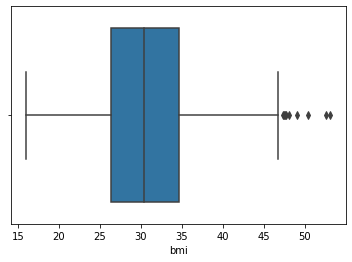

In [15]:
# boxplot for bmi to check outliers
sns.boxplot(x='bmi',data=df)

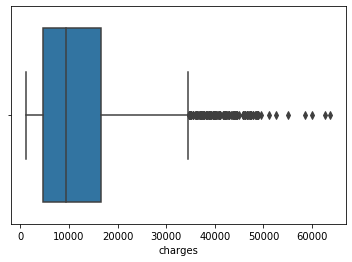

In [16]:
# boxplot for charges to check outliers
sns.boxplot(x='charges',data=df)

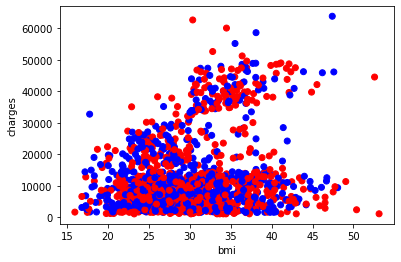

In [17]:
# scatterplot where blue represents female and red represents male
colors={'female':'blue','male':'red'}
plt.scatter(df.bmi,df.charges,c=df['sex'].map(colors))
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

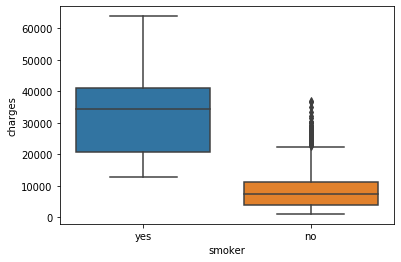

In [18]:
sns.boxplot(x="smoker",y="charges",data=df)

In [19]:
# The above boxplot makes sense because smokers are generally more unhealthy and would have higher medical bills overall

In [20]:
for x in ['sex', 'children', 'smoker', 'region']:
    df[x] = df[x].astype('category')

In [21]:
cat_columns = df.select_dtypes(['category']).columns

In [22]:
# convert categorical values to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


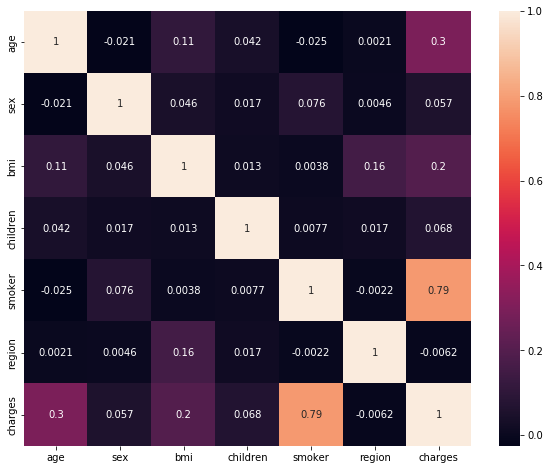

In [23]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

In [24]:
# From the above heatmap, we see that smoker correlates strongly with charges which is consistent with the boxplot

In [26]:
# We can also perform a t-test to determine if there is a statistically significant difference 
# between the average charges of non-smokers vs. smokers
smokers = df[df['smoker'] == 0]
nonsmokers = df[df['smoker'] == 1]
charge_smokers = smokers['charges']
charge_nonsmokers = nonsmokers['charges']

In [28]:
from scipy.stats import ttest_ind

p_value = ttest_ind(charge_smokers, charge_nonsmokers, equal_var=False)
print(p_value)

Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)


In [29]:
# The p-value is 5.889e-103 which is much smaller than 0.05 and indicates that the null hypothesis that there is no difference
# between the two means should be rejected. Thus, there is a significant difference between the average charges of 
# non-smokers and smokers

In [30]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(model.intercept_)

-11862.95841759034


In [34]:
print(model.coef_)

[  257.3181755   -414.01190714   352.79169157   408.58248718
 23183.38769947  -488.9731786 ]


In [35]:
print(model.score(x_test, y_test))

0.7819538635156215
